In [2]:

import pandas as pd
import numpy as np
import pylab as plt
from scipy.stats import chi2_contingency,ttest_ind

#This allows us to use R
%load_ext rpy2.ipython

#Visualize in line
%matplotlib inline

from IPython.display import Image


In [ ]:
groupbby

In [ ]:
## 2. Is count 
In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success with probability p

In [ ]:
For instance, how many

## 1. Independence between variables using contingency tables:
`In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. They are heavily used in survey research, business intelligence, engineering and scientific research. They provide a basic picture of the interrelation between two variables and can help find interactions between them.`
- Visualize interaction between **categorical data**
- We can use the $\chi^2$ (chi-square) test to see if the interactions are significant.

**Example 1:** We will use this class as a sample

    `Is the probability of having dark eyes independent of the gender?`

- What type of variables are "eye color" and "gender"?
- Why should it not?
- Why could it?

In [3]:
df_eyes = pd.DataFrame(
    [
        [5,5],
        [10,10]
    ],columns=["Dark","Clear"],index=["Male","Female"])

df_eyes

,Dark,Clear
Male,5,5
Female,10,10


In [4]:
chi2_contingency(df_eyes)

(0.0, 1.0, 1, array([[  5.,   5.],
        [ 10.,  10.]]))

In [50]:
chi2_contingency?

In [6]:
chi,p,dof,expected = chi2_contingency(df_eyes)
print(p)
expected

1.0


array([[  5.,   5.],
       [ 10.,  10.]])

**How does the test actually work**

$$\chi^2_{statistic} =  \frac{\sum{(Obs - Exp)^2}}{Exp}$$
$$dof = (\#Rows - 1) \cdot (\#Columns -1)$$

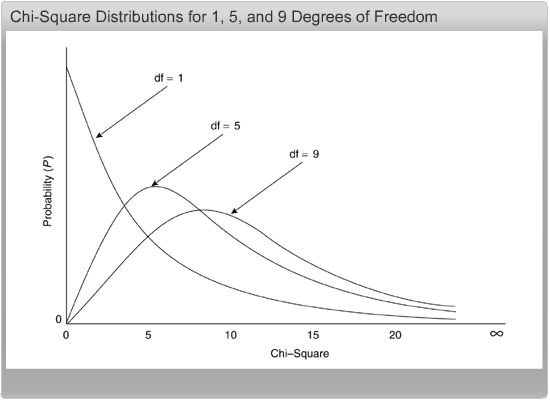

In [58]:
Image("https://learn.bu.edu/bbcswebdav/pid-826908-dt-content-rid-2073693_1/courses/13sprgmetcj702_ol/course_images/metcj702_W06S02T03e_chi.jpg")

In [8]:
df = pd.read_stata("./data/colombia.dta")

In [9]:
df.head()

,pais,idnum,uniq_id,estratopri,estratosec,upm,prov,municipio,cluster,ur,...,r16,r26,colorr,conocim,sexi,colori,nationality,formatq,sex,gi7r
0,Colombia,f4f311fe-034e-4e6b-b964-858809632c74-f707c42a1...,COL14_14081447,Oriental,Pequeña: Menos de 25.000,50577.0,Meta,Puerto Lleras,184,Rural,...,NaN,No,4,Muy bajo,Mujer,3,Colombiano,Android,Hombre,NaN
1,Colombia,f9edf32f-e79e-47fa-ae43-358c05fda719-86d76c1d6...,COL14_14081504,Oriental,Pequeña: Menos de 25.000,15469.0,Boyacá,Moniquirá,160,Rural,...,NaN,No,2,Muy bajo,Hombre,4,Colombiano,Android,Hombre,NaN
2,Colombia,d7e365ab-03b5-4b9e-b1b1-2341cbd57e27-901527f52...,COL14_14081274,Atlántica,Pequeña: Menos de 25.000,8436.0,Atlántico,Manatí,11,Rural,...,NaN,No,8,Muy bajo,Mujer,3,Colombiano,Android,Hombre,NaN
3,Colombia,84848bcd-b1a0-4a2c-a938-3d82bfc36d20-f707c42a1...,COL14_14080774,Oriental,Pequeña: Menos de 25.000,25489.0,Cundinamarca,Nimaima,170,Rural,...,NaN,No,4,Bajo,Mujer,3,Colombiano,Android,Mujer,NaN
4,Colombia,7b7059b6-68bf-4d99-a425-6089f0b85aa1-219eaad88...,COL14_14080711,Central,Mediana: Entre 25.000 y 100.000,5665.0,Antioquia,Urabá,123,Rural,...,NaN,No,3,Ni alto ni bajo,Mujer,5,Colombiano,Android,Hombre,Incorrecto


In [10]:
x_variable = df["colpaz1a"]
other_variables =[df["q1"],df["colpaz2a"]]
a = pd.crosstab(x_variable,other_variables)
a

q1                            Hombre                                    \
colpaz2a                 Muy posible Posible Poco posible Nada posible   
colpaz1a                                                                 
Negociación                       32     121          169           71   
Uso de la fuerza militar           3      22           74          186   
[No leer] Ambas                    0       4           17           22   

q1                             Mujer                                    
colpaz2a                 Muy posible Posible Poco posible Nada posible  
colpaz1a                                                                
Negociación                       26     118          189           94  
Uso de la fuerza militar           3      10           70          141  
[No leer] Ambas                    2       9           17           18

In [11]:
#chi2,p,dof,expected 
pd.DataFrame(chi2_contingency(a)[3])

,0,1,2,3,4,5,6,7
0,20.239774,85.007052,150.352609,161.339915,17.926657,79.224260,159.605078,146.304654
1,12.563470,52.766573,93.328632,100.148801,11.127645,49.177010,99.071932,90.815938
2,2.196756,9.226375,16.318759,17.511283,1.945698,8.598731,17.322990,15.879408


In [22]:
%%R -i a
fisher.test(a,simulate.p.value=TRUE,B=1e6)


	Fisher's Exact Test for Count Data with simulated p-value (based on
	1e+06 replicates)

data:  a
p-value = 0.1665
alternative hypothesis: two.sided



In [ ]:
http://datasets.americasbarometer.org/database-login/usersearch.php?year=2014

In [66]:
a = pd.crosstab(df["colpaz1a"],df["q10new"])


In [80]:
a

q10new,Ningún ingreso,Menos de 160.000,Entre 160.000  250.000,Entre 250.001  340.000,Entre 340.001  420.000,Entre 420.001  480.000,Entre 480.001  540.000,Entre 540.001  590.000,Entre 590.001  650.000,Entre 650.001  720.000,Entre 720.001  810.000,Entre 810.001  960.000,Entre 960.001  1.100.000,Entre 1.100.001  1.400.000,Entre 1.400.001  1.900.000,Entre 1.900.001  3.200.000,Más de 3.200.000
colpaz1a,,,,,,,,,,,,,,,,,
Negociación,5,25,63,51,44,23,38,44,88,59,50,47,52,61,54,48,37
Uso de la fuerza militar,3,10,21,21,23,11,18,28,50,42,32,29,46,35,45,34,29
[No leer] Ambas,1,1,2,4,7,2,4,5,8,8,5,2,6,7,11,6,7


In [79]:
df["q10new"] = df["q10new"].apply(d_cat2salary.get)

In [87]:
neg = df.loc[df["colpaz1a"]=="Negociación","q10new"].values
mil = df.loc[df["colpaz1a"]=="Uso de la fuerza militar","q10new"].values

In [75]:
d_cat2salary = {"nan": np.NaN,
 'Entre 420.001 \x96 480.000':420,
 'Entre 540.001 \x96 590.000': 540,
 'Más de 3.200.000':3200,
 'Entre 250.001 \x96 340.000':250,
 'Entre 1.100.001 \x96 1.400.000':1100,
 'Entre 720.001 \x96 810.000':720,
 'Entre 160.000 \x96 250.000':160,
 'Entre 1.900.001 \x96 3.200.000':1900,
 'Entre 960.001 \x96 1.100.000':960,
 'Entre 480.001 \x96 540.000':480,
 'Entre 810.001 \x96 960.000':810,
 'Entre 340.001 \x96 420.000':340,
 'Menos de 160.000':80,
 'Entre 590.001 \x96 650.000':590,
 'Entre 650.001 \x96 720.000':650,
 'Entre 1.400.001 \x96 1.900.000':1400,
 'Ningún ingreso':0}

In [88]:
ttest_ind(neg[np.isfinite(neg)],mil[np.isfinite(mil)])

Ttest_indResult(statistic=-2.7682290747882634, pvalue=0.0057184953536886891)

In [111]:
n = np.log10(neg[np.isfinite(neg)])
m = np.log10(mil[np.isfinite(mil)])

In [90]:
np.mean(neg[np.isfinite(neg)]),np.mean(mil[np.isfinite(mil)])

(833.97972116603296, 947.58909853249475)

In [113]:
plt.histogram(n[np.isfinite(n)])


(array([ 25,  63,   0,  95,  61, 241,  99, 115,  48,  37]),
 array([ 1.90308999,  2.06329599,  2.22350199,  2.38370798,  2.54391398,
         2.70411998,  2.86432598,  3.02453198,  3.18473798,  3.34494398,
         3.50514998]))

In [114]:
plt.histogram(m[np.isfinite(m)])

(array([ 10,  21,   0,  44,  29, 152,  75,  80,  34,  29]),
 array([ 1.90308999,  2.06329599,  2.22350199,  2.38370798,  2.54391398,
         2.70411998,  2.86432598,  3.02453198,  3.18473798,  3.34494398,
         3.50514998]))

In [116]:
ttest_ind(n[np.isfinite(n)],m[np.isfinite(m)])

Ttest_indResult(statistic=-3.6502846192410963, pvalue=0.00027270720849463873)

In [ ]:
## 1. Independence between variables using contingency tables:
`In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. They are heavily used in survey research, business intelligence, engineering and scientific research. They provide a basic picture of the interrelation between two variables and can help find interactions between them.`
- Visualize interaction between **categorical data**
- We can use the $\chi^2$ (chi-square) test to see if the interactions are significant.

In [6]:
#chi2,p,dof,expected 
d = chi2_contingency(df)

NameError: name 'chi2_contingency' is not defined

In [2]:
import rpy2

In [4]:
%load_ext rpy2.ipython

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [5]:
%load_ext rpy2.ipython
%%R -i df 
fisher.test(df)

ERROR: Line magic function `%R` not found.


In [ ]:

Compare 2 independent samples
Each observation of the dependent variable is independent of the other observations of the dependent variable (its probability distribution isn't affected by their values). Exception: For the paired t-test, we only require that the pair-differences (Ai - Bi) be independent from each other (across i). [Note: "independent" and "dependent" are used in two different senses here. Just think of a "dependent variable" as one thing, and "observations that are dependent" as another thing.]
Dependent variable has a normal distribution, with the same variance, σ2, in each group (as though the distribution for group A were merely shifted over to become the distribution for group B, without changing shape):

In [ ]:


    x = [np.random.randn() for _ in range(200)]
    y = [np.random.randn()+0.6 for _ in range(200)]
    ax = plt.subplot(1,1,1)
    ax.hist(x,bins=np.linspace(np.min(x+y),np.max(x+y),25),alpha=0.3,histtype='stepfilled')
    ax.hist(y,bins=np.linspace(np.min(x+y),np.max(x+y),25),alpha=0.3,histtype='stepfilled')
    ax.set_xlabel('Value',size=20)
    ax.set_ylabel('Freq',size=20)
    customaxis(ax, c_left='k', c_bottom='k', c_right='none', c_top='none', lw=2, size=20, pad=8)
    plt.show()
    



In [ ]:
Compare many groups

In [ ]:
Limited dependent variable

In [ ]:
Fitting distributions

In [ ]:
* Stats recap I: Normality assumptions / t-test / Correlations / Anova / Non-parametric methods / Regression / Mixed models: 2 hours

In [ ]:
Network analysus

In [ ]:
Network analysis overview: 10 minutes

In [ ]:
* Correlation plots, heatmaps and autocorrelation: 0.5 hours